In [4]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

help(mp_face_mesh.FaceMesh)

Help on class FaceMesh in module mediapipe.python.solutions.face_mesh:

class FaceMesh(mediapipe.python.solution_base.SolutionBase)
 |  FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe FaceMesh.
 |  
 |  MediaPipe FaceMesh processes an RGB image and returns the face landmarks on
 |  each detected face.
 |  
 |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceMesh
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe FaceMesh object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and possibly unrelated images, or a video stream. See 

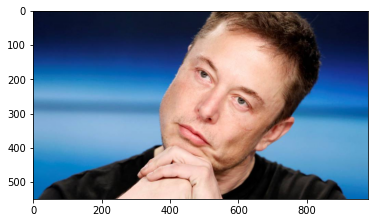

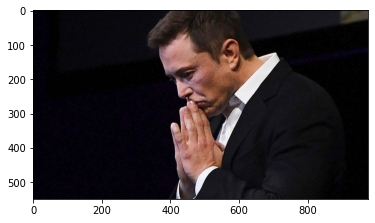

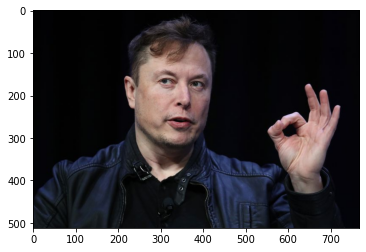

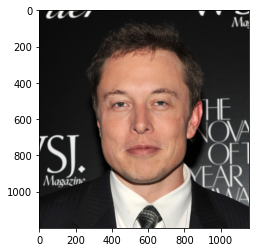

In [13]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
images = [cv2.imread(f"data/{image}.jpg") for image in range(1,4)]
images.append(cv2.imread("data/straight.png"))
for image in images:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

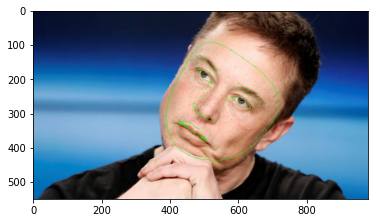

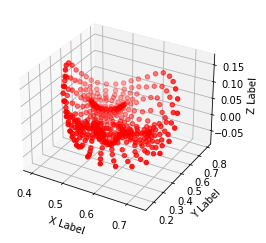

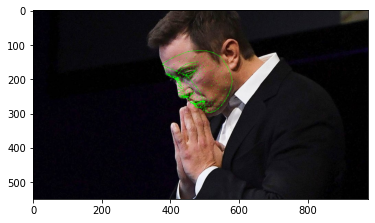

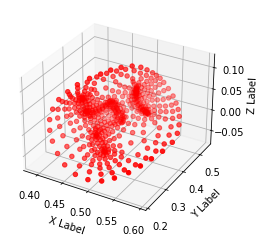

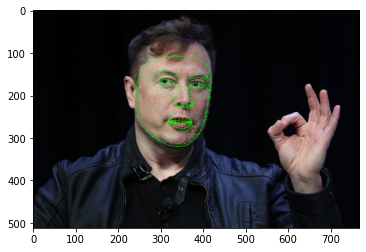

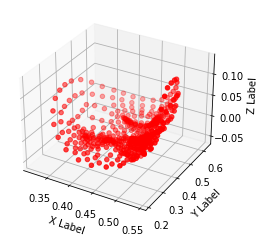

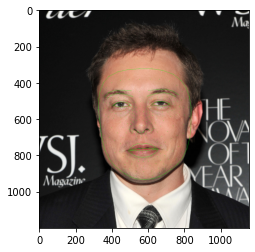

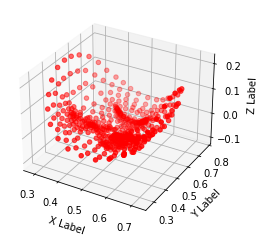

In [10]:
from mpl_toolkits.mplot3d import Axes3D

face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=2,
    min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

for image in images:
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not results.multi_face_landmarks:
        continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACE_CONNECTIONS,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec
        )
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.show()

    x = [landmark.x for landmark in results.multi_face_landmarks[0].landmark]
    y = [landmark.y for landmark in results.multi_face_landmarks[0].landmark]
    z = [landmark.z for landmark in results.multi_face_landmarks[0].landmark]
    # print(x,y,z)
    # print(
    #     results.multi_face_landmarks[0].landmark[10],
    #     results.multi_face_landmarks[0].landmark[152],
    #     results.multi_face_landmarks[0].landmark[234],
    #     results.multi_face_landmarks[0].landmark[454],
    #     results.multi_face_landmarks[0].landmark[5]
    # )

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c='r', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

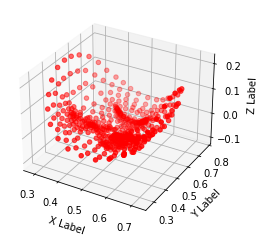

[0.4894569218158722, 0.4810517728328705, 0.4860399663448334, 0.465358704328537, 0.479687362909317, 0.47936493158340454, 0.4809713363647461, 0.35907989740371704, 0.4807303845882416, 0.479871928691864, 0.4785226285457611, 0.49021944403648376, 0.4911617338657379, 0.4921152889728546, 0.4938219487667084, 0.4940522313117981, 0.49449944496154785, 0.49532294273376465, 0.49725496768951416, 0.4826321601867676, 0.46924084424972534, 0.2915848195552826, 0.41048663854599, 0.39253732562065125, 0.3753930926322937, 0.35259637236595154, 0.42527100443840027, 0.3858731985092163, 0.4043494462966919, 0.36878082156181335, 0.3574025630950928, 0.3371254801750183, 0.43284812569618225, 0.3531457185745239, 0.28570929169654846, 0.31658363342285156, 0.3996698558330536, 0.4689773619174957, 0.4742124676704407, 0.44951748847961426, 0.4377193748950958, 0.460487961769104, 0.44999492168426514, 0.41954338550567627, 0.4667857885360718, 0.4631916880607605, 0.32629379630088806, 0.43300971388816833, 0.43142807483673096, 0.430

In [12]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

# for image in images:
results = face_mesh.process(cv2.cvtColor(images[-1], cv2.COLOR_BGR2RGB))
if not results.multi_face_landmarks:
    pass
face_landmarks = results.multi_face_landmarks[0]
    # print(len(face_landmarks.landmark))
x = [landmark.x for landmark in face_landmarks.landmark]
y = [landmark.y for landmark in face_landmarks.landmark]
z = [landmark.z for landmark in face_landmarks.landmark]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

print(x)
print(y)
print(z)

In [3]:
from typing import NamedTuple
class Point(NamedTuple):
    x: float
    y: float
    z: float
    def to_wolfram(self):
        return f"Hello from wolfram {self.x}"

point = Point(1,2,3)

for i in point:
    print(i)

print(point.to_wolfram())
print(point.x)

1
2
3
Hello from wolfram 1
1
